In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/Master\ Thesis/master-thesis/code

/content/drive/My Drive/Colab Notebooks/Master Thesis/master-thesis/code


In [1]:
!python word_embedding.py -emb_dim 300

Using TensorFlow backend.
training word embeddings ...
2019-08-05 20:55:19,667 INFO collecting all words and their counts
2019-08-05 20:55:19,667 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-05 20:55:19,829 INFO PROGRESS: at sentence #10000, processed 251223 words, keeping 16149 word types
2019-08-05 20:55:19,984 INFO PROGRESS: at sentence #20000, processed 479136 words, keeping 20641 word types
2019-08-05 20:55:20,131 INFO PROGRESS: at sentence #30000, processed 700561 words, keeping 25422 word types
2019-08-05 20:55:20,271 INFO PROGRESS: at sentence #40000, processed 911358 words, keeping 29276 word types
2019-08-05 20:55:20,428 INFO PROGRESS: at sentence #50000, processed 1160570 words, keeping 32759 word types
2019-08-05 20:55:20,632 INFO PROGRESS: at sentence #60000, processed 1512491 words, keeping 37460 word types
2019-08-05 20:55:20,794 INFO collected 40208 word types from a corpus of 1765518 raw words and 69342 sentences
2019-08-05 20:55:20,79

2019-08-05 20:55:34,056 INFO worker thread finished; awaiting finish of 0 more threads
2019-08-05 20:55:34,056 INFO EPOCH - 5 : training on 1765518 raw words (1572642 effective words) took 2.6s, 609234 effective words/s
2019-08-05 20:55:35,075 INFO EPOCH 6 - PROGRESS: at 31.85% examples, 460897 words/s, in_qsize 23, out_qsize 0
2019-08-05 20:55:36,078 INFO EPOCH 6 - PROGRESS: at 74.45% examples, 535107 words/s, in_qsize 23, out_qsize 0
2019-08-05 20:55:36,551 INFO worker thread finished; awaiting finish of 11 more threads
2019-08-05 20:55:36,552 INFO worker thread finished; awaiting finish of 10 more threads
2019-08-05 20:55:36,553 INFO worker thread finished; awaiting finish of 9 more threads
2019-08-05 20:55:36,556 INFO worker thread finished; awaiting finish of 8 more threads
2019-08-05 20:55:36,557 INFO worker thread finished; awaiting finish of 7 more threads
2019-08-05 20:55:36,561 INFO worker thread finished; awaiting finish of 6 more threads
2019-08-05 20:55:36,565 INFO worker 

2019-08-05 20:55:49,697 INFO worker thread finished; awaiting finish of 2 more threads
2019-08-05 20:55:49,698 INFO worker thread finished; awaiting finish of 1 more threads
2019-08-05 20:55:49,698 INFO worker thread finished; awaiting finish of 0 more threads
2019-08-05 20:55:49,698 INFO EPOCH - 11 : training on 1765518 raw words (1572595 effective words) took 2.6s, 601765 effective words/s
2019-08-05 20:55:50,766 INFO EPOCH 12 - PROGRESS: at 31.41% examples, 431110 words/s, in_qsize 21, out_qsize 2
2019-08-05 20:55:51,829 INFO EPOCH 12 - PROGRESS: at 75.56% examples, 520274 words/s, in_qsize 22, out_qsize 1
2019-08-05 20:55:52,216 INFO worker thread finished; awaiting finish of 11 more threads
2019-08-05 20:55:52,234 INFO worker thread finished; awaiting finish of 10 more threads
2019-08-05 20:55:52,236 INFO worker thread finished; awaiting finish of 9 more threads
2019-08-05 20:55:52,244 INFO worker thread finished; awaiting finish of 8 more threads
2019-08-05 20:55:52,256 INFO work

In [6]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 


ln: cannot remove '/usr/bin/nvidia-smi': Device or resource busy
You are using pip version 18.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Gen RAM Free: 5.9 GB  | Proc size: 789.3 MB
GPU RAM Free: 12027MB | Used: 183MB | Util   1% | Total 12210MB


In [1]:
with open('../preprocessed_data/whole_comments_filtered.txt') as f:
    len_array=[]
    for line in f:
        len_array.append(len(line.split()))
from collections import Counter
c=Counter()
c.update(len_array)
c.most_common()

[(8, 2541),
 (7, 2472),
 (6, 2451),
 (10, 2362),
 (5, 2358),
 (9, 2356),
 (11, 2315),
 (12, 2206),
 (13, 2152),
 (14, 2058),
 (15, 1956),
 (4, 1949),
 (16, 1934),
 (17, 1765),
 (18, 1727),
 (20, 1681),
 (19, 1594),
 (21, 1485),
 (23, 1460),
 (22, 1457),
 (3, 1320),
 (24, 1281),
 (25, 1211),
 (26, 1175),
 (27, 1172),
 (28, 1093),
 (29, 1036),
 (30, 990),
 (31, 919),
 (32, 857),
 (33, 849),
 (34, 772),
 (36, 742),
 (35, 733),
 (37, 647),
 (38, 634),
 (2, 622),
 (39, 589),
 (40, 582),
 (41, 531),
 (42, 510),
 (43, 500),
 (44, 480),
 (45, 442),
 (46, 427),
 (47, 420),
 (48, 386),
 (50, 375),
 (49, 357),
 (51, 293),
 (53, 281),
 (52, 276),
 (56, 259),
 (55, 255),
 (54, 240),
 (59, 226),
 (61, 222),
 (57, 217),
 (69, 205),
 (60, 204),
 (58, 195),
 (63, 180),
 (62, 177),
 (66, 158),
 (67, 150),
 (73, 143),
 (65, 139),
 (64, 134),
 (71, 132),
 (78, 129),
 (68, 116),
 (72, 111),
 (75, 110),
 (74, 107),
 (83, 98),
 (70, 97),
 (76, 95),
 (77, 90),
 (90, 89),
 (1, 85),
 (79, 84),
 (80, 84),
 (87, 

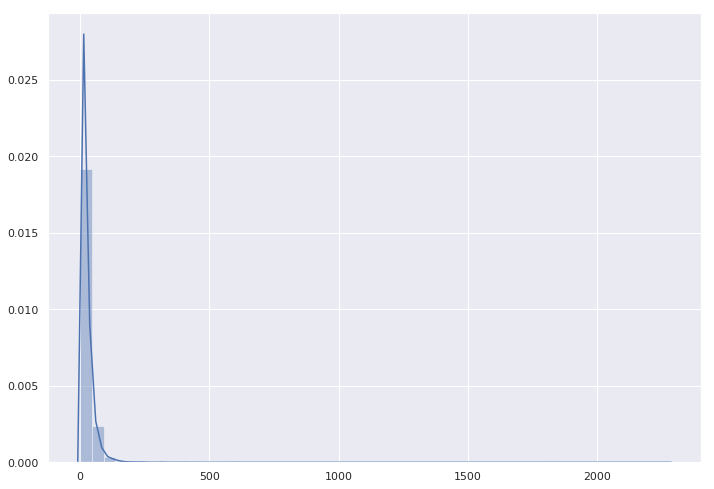

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.distplot(len_array)

In [15]:
!python train.py -v 19000 --maxlen 200 --emb-name w2v_embedding_skipgram_300 -emb_tech fasttext --c_range '35-51' --epochs 15 -e 300 --cluster_step 15 -b 64 -n 10

Using TensorFlow backend.
2019-08-12 05:09:22,003 INFO Cluster Size: 35
Creating vocab ...
1729193 total words, 39473 unique words
keep the top 19000 words
Reading dataset ...
train set
<num> hit rate: 0.00%, <unk> hit rate: 1.40%
Number of training examples:  69342
Length of vocab:  19003
2019-08-12 05:09:27,940 INFO Building fasttext based model for en
2019-08-12 05:09:27,940 INFO Loading embeddings from: ../preprocessed_data/fasttext/full_trained/w2v_embedding_skipgram_300
2019-08-12 05:09:27,940 INFO loading FastText object from ../preprocessed_data/fasttext/full_trained/w2v_embedding_skipgram_300
2019-08-12 05:09:28,582 INFO loading wv recursively from ../preprocessed_data/fasttext/full_trained/w2v_embedding_skipgram_300.wv.* with mmap=None
2019-08-12 05:09:28,582 INFO loading vectors_ngrams from ../preprocessed_data/fasttext/full_trained/w2v_embedding_skipgram_300.wv.vectors_ngrams.npy with mmap=None
2019-08-12 05:09:28,649 INFO setting ignored attribute vectors_norm to None
2019

<num> hit rate: 0.00%, <unk> hit rate: 1.40%
Number of training examples:  69342
Length of vocab:  19003
2019-08-12 05:13:39,005 INFO Building fasttext based model for en
2019-08-12 05:13:39,005 INFO Loading embeddings from: ../preprocessed_data/fasttext/full_trained/w2v_embedding_skipgram_300
2019-08-12 05:13:39,005 INFO loading FastText object from ../preprocessed_data/fasttext/full_trained/w2v_embedding_skipgram_300
2019-08-12 05:13:39,553 INFO loading wv recursively from ../preprocessed_data/fasttext/full_trained/w2v_embedding_skipgram_300.wv.* with mmap=None
2019-08-12 05:13:39,554 INFO loading vectors_ngrams from ../preprocessed_data/fasttext/full_trained/w2v_embedding_skipgram_300.wv.vectors_ngrams.npy with mmap=None
2019-08-12 05:13:39,610 INFO setting ignored attribute vectors_norm to None
2019-08-12 05:13:39,610 INFO setting ignored attribute vectors_vocab_norm to None
2019-08-12 05:13:39,611 INFO setting ignored attribute vectors_ngrams_norm to None
2019-08-12 05:13:39,611 I

## German data

In [1]:
!python word_embedding.py -emb_dim 300 -lang de -emb_name 'fasttext' -ft_method 'skipgram'

Using TensorFlow backend.
training fasttext word embeddings for de...
2019-08-22 23:12:24,020 INFO resetting layer weights
2019-08-22 23:12:45,524 INFO collecting all words and their counts
2019-08-22 23:12:45,541 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-22 23:12:45,738 INFO PROGRESS: at sentence #10000, processed 194153 words, keeping 18629 word types
2019-08-22 23:12:45,938 INFO PROGRESS: at sentence #20000, processed 418805 words, keeping 44713 word types
2019-08-22 23:12:46,105 INFO PROGRESS: at sentence #30000, processed 568126 words, keeping 60296 word types
2019-08-22 23:12:46,280 INFO PROGRESS: at sentence #40000, processed 759696 words, keeping 74446 word types
2019-08-22 23:12:46,295 INFO collected 75663 word types from a corpus of 777208 raw words and 40620 sentences
2019-08-22 23:12:46,295 INFO Loading a fresh vocabulary
2019-08-22 23:12:46,357 INFO effective_min_count=5 retains 13513 unique words (17% of original 75663, drops 62150)
20

2019-08-22 23:13:27,111 INFO worker thread finished; awaiting finish of 7 more threads
2019-08-22 23:13:27,140 INFO worker thread finished; awaiting finish of 6 more threads
2019-08-22 23:13:27,158 INFO worker thread finished; awaiting finish of 5 more threads
2019-08-22 23:13:27,237 INFO worker thread finished; awaiting finish of 4 more threads
2019-08-22 23:13:27,304 INFO worker thread finished; awaiting finish of 3 more threads
2019-08-22 23:13:27,420 INFO worker thread finished; awaiting finish of 2 more threads
2019-08-22 23:13:27,480 INFO worker thread finished; awaiting finish of 1 more threads
2019-08-22 23:13:27,529 INFO worker thread finished; awaiting finish of 0 more threads
2019-08-22 23:13:27,530 INFO EPOCH - 4 : training on 777208 raw words (648129 effective words) took 7.3s, 89387 effective words/s
2019-08-22 23:13:28,547 INFO EPOCH 5 - PROGRESS: at 2.90% examples, 16659 words/s, in_qsize 23, out_qsize 0
2019-08-22 23:13:29,725 INFO EPOCH 5 - PROGRESS: at 16.40% example

2019-08-22 23:13:58,487 INFO EPOCH 9 - PROGRESS: at 16.44% examples, 54796 words/s, in_qsize 22, out_qsize 1
2019-08-22 23:13:59,502 INFO EPOCH 9 - PROGRESS: at 31.40% examples, 70561 words/s, in_qsize 23, out_qsize 0
2019-08-22 23:14:00,532 INFO EPOCH 9 - PROGRESS: at 43.14% examples, 76525 words/s, in_qsize 23, out_qsize 0
2019-08-22 23:14:01,549 INFO EPOCH 9 - PROGRESS: at 62.90% examples, 81768 words/s, in_qsize 23, out_qsize 0
2019-08-22 23:14:02,710 INFO EPOCH 9 - PROGRESS: at 82.08% examples, 83440 words/s, in_qsize 15, out_qsize 0
2019-08-22 23:14:02,844 INFO worker thread finished; awaiting finish of 11 more threads
2019-08-22 23:14:02,943 INFO worker thread finished; awaiting finish of 10 more threads
2019-08-22 23:14:03,033 INFO worker thread finished; awaiting finish of 9 more threads
2019-08-22 23:14:03,041 INFO worker thread finished; awaiting finish of 8 more threads
2019-08-22 23:14:03,215 INFO worker thread finished; awaiting finish of 7 more threads
2019-08-22 23:14:0

2019-08-22 23:14:32,194 INFO worker thread finished; awaiting finish of 7 more threads
2019-08-22 23:14:32,248 INFO worker thread finished; awaiting finish of 6 more threads
2019-08-22 23:14:32,267 INFO worker thread finished; awaiting finish of 5 more threads
2019-08-22 23:14:32,356 INFO worker thread finished; awaiting finish of 4 more threads
2019-08-22 23:14:32,394 INFO worker thread finished; awaiting finish of 3 more threads
2019-08-22 23:14:32,483 INFO worker thread finished; awaiting finish of 2 more threads
2019-08-22 23:14:32,583 INFO worker thread finished; awaiting finish of 1 more threads
2019-08-22 23:14:32,586 INFO worker thread finished; awaiting finish of 0 more threads
2019-08-22 23:14:32,586 INFO EPOCH - 13 : training on 777208 raw words (648127 effective words) took 7.2s, 89672 effective words/s
2019-08-22 23:14:33,590 INFO EPOCH 14 - PROGRESS: at 1.23% examples, 8565 words/s, in_qsize 24, out_qsize 0
2019-08-22 23:14:34,606 INFO EPOCH 14 - PROGRESS: at 16.49% examp

In [1]:
import codecs
with codecs.open('../preprocessed_data/german/whole_comments_filtered.txt',encoding = 'utf-8') as f:
    len_array=[]
    for line in f:
        len_array.append(len(line.split()))
from collections import Counter
c=Counter()
c.update(len_array)
c.most_common()

[(9, 1885),
 (8, 1808),
 (10, 1788),
 (7, 1784),
 (11, 1763),
 (6, 1720),
 (5, 1619),
 (12, 1546),
 (13, 1476),
 (14, 1472),
 (4, 1454),
 (16, 1281),
 (15, 1258),
 (17, 1222),
 (3, 1149),
 (19, 1139),
 (18, 1117),
 (20, 1020),
 (22, 911),
 (21, 872),
 (23, 776),
 (24, 710),
 (25, 669),
 (26, 630),
 (27, 598),
 (2, 578),
 (28, 533),
 (29, 497),
 (31, 431),
 (30, 428),
 (32, 386),
 (33, 366),
 (34, 359),
 (35, 321),
 (1, 301),
 (37, 259),
 (36, 258),
 (40, 252),
 (38, 247),
 (39, 232),
 (41, 217),
 (42, 184),
 (44, 180),
 (43, 179),
 (45, 161),
 (46, 136),
 (47, 134),
 (50, 126),
 (49, 122),
 (51, 108),
 (48, 107),
 (52, 100),
 (53, 98),
 (54, 93),
 (57, 85),
 (56, 83),
 (55, 78),
 (58, 72),
 (60, 71),
 (59, 66),
 (61, 62),
 (65, 61),
 (64, 49),
 (62, 48),
 (63, 45),
 (68, 41),
 (73, 41),
 (67, 40),
 (71, 36),
 (74, 36),
 (66, 34),
 (84, 28),
 (69, 26),
 (77, 25),
 (75, 24),
 (76, 23),
 (70, 22),
 (78, 19),
 (72, 18),
 (80, 17),
 (81, 16),
 (90, 16),
 (86, 15),
 (92, 14),
 (106, 14),
 (8

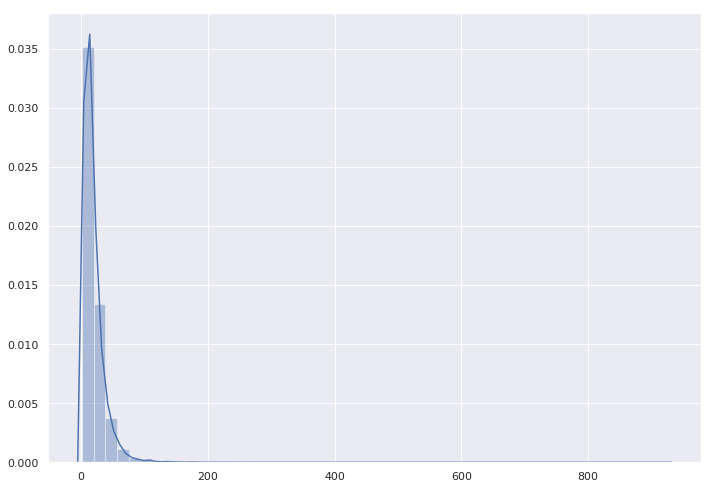

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.distplot(len_array)

In [2]:
 !python train.py -v 30000 --maxlen 100 --emb-name hybrid_embed_ortho_procrsutes -emb_tech w2v --lang de --c_range '35-51' --epochs 15 -e 300 --cluster_step 15 -b 64 -n 10

Using TensorFlow backend.
2019-08-27 19:21:12,880 INFO Cluster Size: 35
Creating vocab ...
744798 total words, 72633 unique words
keep the top 30000 words
Reading dataset ...
train set
<num> hit rate: 0.00%, <unk> hit rate: 5.97%
Number of training examples:  40620
Length of vocab:  30003
2019-08-27 19:21:16,212 INFO Building w2v based model for de
2019-08-27 19:21:16,212 INFO Load de glove embedding for fine_tuned
2019-08-27 19:21:16,212 INFO Loading hybrid embeddings for fine tuning from: ../preprocessed_data/german/w2v/fine_tuned/hybrid_embed_ortho_procrsutes
2019-08-27 19:21:16,267 INFO #vectors: 6144, #dimensions: 300
2019-08-27 19:21:23,070 INFO Initializing word embedding matrix
2019-08-27 19:21:23.612218: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-08-27 19:21:23.612841: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] 

100%|#########################################| 634/634 [00:07<00:00, 84.08it/s]
2019-08-27 19:23:25,976 INFO Epoch 0, train: 7s
2019-08-27 19:23:25,976 INFO Total loss: 5.2360, max_margin_loss: 4.8423, ortho_reg: 0.3937
100%|#########################################| 634/634 [00:06<00:00, 97.07it/s]
2019-08-27 19:23:32,902 INFO Epoch 1, train: 6s
2019-08-27 19:23:32,902 INFO Total loss: 2.9892, max_margin_loss: 2.8866, ortho_reg: 0.1026
100%|#########################################| 634/634 [00:06<00:00, 95.90it/s]
2019-08-27 19:23:39,905 INFO Epoch 2, train: 6s
2019-08-27 19:23:39,905 INFO Total loss: 2.6482, max_margin_loss: 2.5456, ortho_reg: 0.1026
100%|#########################################| 634/634 [00:06<00:00, 95.86it/s]
2019-08-27 19:23:46,893 INFO Epoch 3, train: 6s
2019-08-27 19:23:46,894 INFO Total loss: 2.4922, max_margin_loss: 2.3896, ortho_reg: 0.1027
100%|#########################################| 634/634 [00:06<00:00, 94.78it/s]
2019-08-27 19:23:53,940 INFO Epoch 